In [1]:
# import the required libraries 
import numpy as np
import pandas as pd

In [2]:
# read the data file in a dataframe
df = pd.read_csv(r"movies.csv")

In [3]:
# view the data
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [4]:
# cleaning the data
# explore the the data
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [5]:
# check for missing values
df.isna().any().any()

False

In [6]:
#sum of missing values on each column
df.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

In [7]:
# creating a list of release year
year = []
for val in df['released'].values:
    year.append(val[:4])


In [8]:
# rectfying the year column to actual released year
df['year'] = year

In [9]:
df.tail()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016
6819,0.0,Les Productions du Tr�sor,France,Nicole Garcia,Drama,37757.0,From the Land of the Moon,R,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2017


In [35]:
# list countries in the datafram
df['country'].unique().tolist()

['USA',
 'UK',
 'Australia',
 'Italy',
 'France',
 'Sweden',
 'Japan',
 'Spain',
 'Switzerland',
 'Canada',
 'Israel',
 'Netherlands',
 'Argentina',
 'Denmark',
 'West Germany',
 'Hong Kong',
 'Belgium',
 'Ireland',
 'South Africa',
 'Hungary',
 'Iran',
 'New Zealand',
 'Germany',
 'China',
 'Peru',
 'Soviet Union',
 'Mexico',
 'Brazil',
 'Taiwan',
 'India',
 'Austria',
 'Portugal',
 'Cuba',
 'Republic of Macedonia',
 'Russia',
 'Greece',
 'Norway',
 'Romania',
 'Jamaica',
 'Federal Republic of Yugoslavia',
 'Aruba',
 'Czech Republic',
 'South Korea',
 'Finland',
 'Thailand',
 'Colombia',
 'Palestine',
 'Indonesia',
 'Saudi Arabia',
 'Chile',
 'Poland',
 'Kenya',
 'Bahamas',
 'Ukraine',
 'Iceland',
 'Malta',
 'Panama']

In [10]:
# number of countries in the dataframe
df['country'].nunique()

57

In [11]:
#number of movies per country
df['country'].value_counts()
df2 = pd.DataFrame(df['country'].value_counts())
df2.rename(columns={'country':"no_of_movies"}, inplace=True)
df2.head()

,no_of_movies
USA,4872
UK,698
France,283
Canada,150
Germany,134


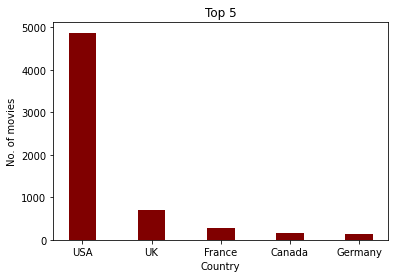

In [30]:
# a bar plot of movies per country
import matplotlib.pyplot as plt
df3 = df2.head()
plt.bar(df3.index, df3["no_of_movies"], color ='maroon',
        width = 0.4)
plt.xlabel("Country")
plt.ylabel("No. of movies")
plt.title("Top 5")
plt.show()

In [34]:
# display movies available to general audience
rating_grp = df.groupby('rating')
public = rating_grp.get_group('G')
public.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
41,0.0,Universal Pictures,USA,Don Bluth,Animation,47483002.0,An American Tail,G,1986-11-21,80,6.9,Dom DeLuise,41004,Judy Freudberg,1986
53,14000000.0,Walt Disney Pictures,USA,Ron Clements,Animation,38600000.0,The Great Mouse Detective,G,1986-07-02,74,7.2,Vincent Price,36539,Peter Young,1986
85,0.0,Fuji Television Network,Japan,Masanori Hata,Adventure,13245219.0,The Adventures of Milo and Otis,G,1989-08-25,90,7.1,Ky�ko Koizumi,9178,Masanori Hata,1989
102,0.0,Sunbow Productions,USA,Mike Joens,Animation,5958456.0,My Little Pony: The Movie,G,1986-06-06,86,6.0,Danny DeVito,2125,George Arthur Bloom,1986
165,0.0,Nelvana,Canada,Dale Schott,Animation,8540346.0,Care Bears Movie II: A New Generation,G,1986-03-21,76,5.3,Maxine Miller,1760,Peter Sauder,1986


In [86]:
# get movies released in any year
years = df.groupby('year')
years.get_group('2017').head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6465,0.0,Nordisk Film,Denmark,Martin Zandvliet,Drama,434640.0,Bajo la arena,R,2017-05-26,100,7.8,Roland M�ller,17582,Martin Zandvliet,2017
6478,0.0,Paris Film,Canada,Oz Perkins,Horror,19980.0,The Blackcoat's Daughter,R,2017-02-16,93,5.8,Emma Roberts,6768,Oz Perkins,2017
6545,0.0,Bayerischer Rundfunk (BR),Germany,Julian Rosefeldt,Drama,143656.0,Manifesto,NOT RATED,2017-11-23,95,7.2,Cate Blanchett,1314,Julian Rosefeldt,2017
6567,0.0,Screen NSW,Australia,Simon Stone,Drama,26376.0,The Daughter,Not specified,2017-01-27,96,6.7,Geoffrey Rush,3194,Simon Stone,2017
6576,0.0,Audiovisual Aval SGR,Spain,Cesc Gay,Comedy,208799.0,Una sonrisa a la vida,TV-14,2017-04-07,108,7.3,Ricardo Dar�n,7973,Tom�s Aragay,2017


In [87]:
# get movies by country
countries = df.groupby('country')
countries.get_group('UK').head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1987
6,25000000.0,Henson Associates (HA),UK,Jim Henson,Adventure,12729917.0,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986
11,16000000.0,Thorn EMI Screen Entertainment,UK,Russell Mulcahy,Action,5900000.0,Highlander,R,1986-03-07,116,7.2,Christopher Lambert,104860,Gregory Widen,1986
33,24500000.0,Warner Bros.,UK,Roland Joff�,Adventure,17218023.0,The Mission,PG,1986-10-31,125,7.5,Robert De Niro,47497,Robert Bolt,1986
42,4000000.0,Initial Pictures,UK,Alex Cox,Biography,2826523.0,Sid and Nancy,R,1986-11-07,112,7.1,Gary Oldman,25032,Alex Cox,1986


In [36]:
# display movie with the highest vote
df[df["votes"]==df["votes"].max()]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
1760,25000000.0,Castle Rock Entertainment,USA,Frank Darabont,Crime,28341469.0,The Shawshank Redemption,R,1994-10-14,142,9.3,Tim Robbins,1861666,Stephen King,1994


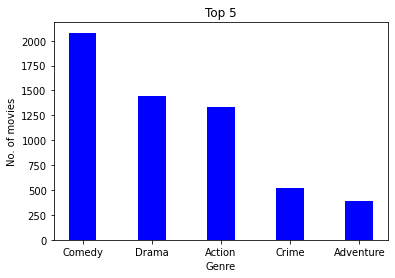

In [48]:
# plot the number movies by genre ( top 5)
df4 = pd.DataFrame(df["genre"].value_counts())
df4.rename(columns={"genre":"no_of_movies"}, inplace=True)
df4 = df4.head()
df4
plt.bar(df4.index, df4["no_of_movies"], color ='blue',
        width = 0.4)
plt.xlabel("Genre")
plt.ylabel("No. of movies")
plt.title("Top 5")
plt.show()

In [49]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


<AxesSubplot:xlabel='gross', ylabel='votes'>

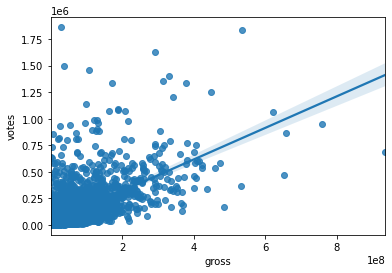

In [60]:
# relation between gross income and number of votes
import seaborn as sns
sns.regplot(data=df, x="gross", y="votes")

In [62]:
# correlation between gross income and number of votes
df[['gross','votes']].corr()

,gross,votes
gross,1.000000,0.662457
votes,0.662457,1.000000
